## **Example BAG Read**

THis notebook shows a quick example of how to stream the RaDICaL .bag file

In [1]:
import numpy as np
from pathlib import Path
from bag_streamer import stream_rosbag
import matplotlib.pyplot as plt 

%matplotlib inline

Get filepaths

In [2]:
BAG_PATH = Path('/home/iberrios/Documents/datasets/radical/data/50m_collection/2020-07-25-10-23-06.bag')
RADAR_CONFIG = Path('/home/iberrios/Documents/datasets/radical/data/radarcfg/outdoor_human_rcs_50m.cfg')

Select desired topics

In [3]:
topics = [
    'radar', 
    # 'depth', 
    'rgb', 
    # 'imu_accel', 
    # 'imu_gyro'
]

Get generator 

NOTE: 'typestore' is defaulted to a value that works for 

In [4]:
stream_gen = stream_rosbag(BAG_PATH, RADAR_CONFIG, topics=topics, max_idx=9900, verbose=True)

Stream Data

In [5]:
bag_data = []
for i, data in enumerate(stream_gen):
    bag_data.append(data)

1595686986626130871   radar
1595686986640145894   rgb
1595686986659112114   radar
1595686986673618571   rgb
1595686986692140845   radar
1595686986706684330   rgb
1595686986725143634   radar
1595686986739523586   rgb
1595686986757991247   radar
1595686986772868734   rgb
1595686986791088927   radar
1595686986806730444   rgb
1595686986824046258   radar
1595686986840706637   rgb
1595686986857261023   radar
1595686986873453882   rgb
1595686986890051245   radar
1595686986906218039   rgb
1595686986923013528   radar
1595686986939565838   rgb
1595686986956018742   radar
1595686986973237871   rgb
1595686986988996323   radar
1595686987006531988   rgb
1595686987021957860   radar
1595686987039755546   rgb
1595686987055046057   radar
1595686987073114981   rgb
1595686987088061359   radar
1595686987106789611   rgb
1595686987120990006   radar
1595686987139691294   rgb
1595686987154076180   radar
1595686987173086858   rgb
1595686987187175850   radar
1595686987206451598   rgb
1595686987220312497   radar


In [6]:
len(bag_data)

806

In [7]:
bag_data[-1]

(9898,
 1595686999981894592,
 'rgb',
 array([[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [252, 255, 254],
         [252, 255, 254],
         [252, 255, 254]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [252, 255, 254],
         [252, 255, 254],
         [252, 255, 254]],
 
        ...,
 
        [[ 44,  48,  43],
         [ 43,  47,  42],
         [ 41,  48,  42],
         ...,
         [ 21,  30,  23],
         [ 20,  29,  22],
         [ 20,  29,  22]],
 
        [[ 43,  47,  42],
         [ 43,  47,  42],
         [ 39,  48,  41],
         ...,
         [ 22,  31,  22],
         [ 21,  30,  21],
         [ 22,  31,  22]],
 
        [[ 44,  48,  43],
         [ 44,  48,  43],
         [ 41,  50,  43],
     

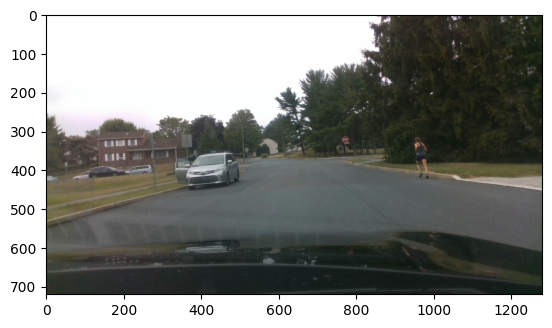

In [8]:
rgb_image = bag_data[-318][-1]

plt.imshow(rgb_image);

Read Radar data

In [9]:
from radicalsdk.radar.config_v1 import read_radar_params
from radicalsdk.radar.v1 import RadarFrame

# assume data object is Radar data
adc_data = bag_data[-319][-1]

radar_config = read_radar_params(RADAR_CONFIG)
rf = RadarFrame(radar_config);

rf.raw_cube = adc_data

In [12]:
radar_config

{'numLanes': 4,
 'rx4': True,
 'rx3': True,
 'rx2': True,
 'rx1': True,
 'numTx': 2,
 'tx3': True,
 'tx2': False,
 'tx1': True,
 'isComplex': True,
 'image_band': False,
 'profiles': [{'id': 0,
   'start_frequency': 77000000000.0,
   'idle': 8e-06,
   'adcStartTime': 7e-06,
   'rampEndTime': 1.3119999999999998e-05,
   'txPower': 0.0,
   'txPhaseShift': 0.0,
   'freqSlopeConst': 30000000000000.0,
   'txStartTime': 1e-06,
   'adcSamples': 64,
   'adcSampleRate': 12499000.0,
   'hpfCornerFreq1': 0,
   'hpfCornerFreq2': 0,
   'rxGain': 30.0}],
 'chirps': [{'chirpStartIndex': 0,
   'chirpStopIndex': 0,
   'profileID': 0,
   'startFreqVariation': 0.0,
   'slopeVariation': 0.0,
   'idleVariation': 0.0,
   'adcStartVariation': 0.0,
   'chirptx3': False,
   'chirptx2': False,
   'chirptx1': True},
  {'chirpStartIndex': 1,
   'chirpStopIndex': 1,
   'profileID': 0,
   'startFreqVariation': 0.0,
   'slopeVariation': 0.0,
   'idleVariation': 0.0,
   'adcStartVariation': 0.0,
   'chirptx3': True,
 

In [13]:
adc_data.shape

(128, 8, 64)

In [14]:
print(f"Number of Angle Bins is {rf.angle_bins}, with {rf.angle_res} degree resolution")
print(f"Number of Range Bins is {rf.range_nbins}, with  {rf.range_resolution:0.4f} m resolution")
print(f"Number of Doppler Bins is {rf.doppler_bins}, with  {rf.doppler_resolution:0.4f} m/s resolution")

Number of Angle Bins is 181, with 1 degree resolution
Number of Range Bins is 64, with  0.9758 m resolution
Number of Doppler Bins is 128, with  0.3597 m/s resolution


In [15]:
from mmwave import dsp

# process Range (Fast Time FFT)
range_cube = rf.range_cube

# Process Doppler (Slow Time FFT)
range_doppler, aoa_input = dsp.doppler_processing(range_cube.transpose(2, 1, 0))
range_doppler = np.fft.fftshift(range_doppler.T, axes=0)

# Process Angle (Azimuth only)
rf.compute_range_azimuth(adc_data)
range_azimuth = rf.range_azimuth_capon

In [16]:
range_cube.shape, range_doppler.shape

((64, 8, 128), (64, 64))

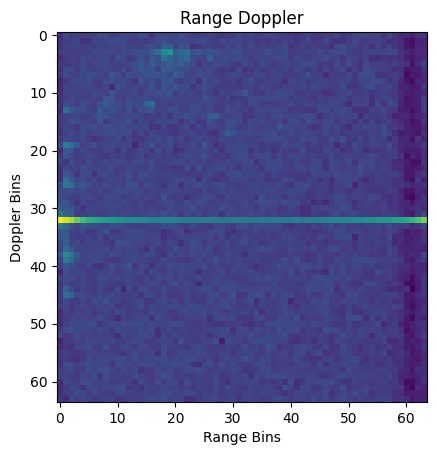

In [17]:
plt.imshow(range_doppler);
plt.xlabel("Range Bins");
plt.ylabel("Doppler Bins");
plt.title("Range Doppler");

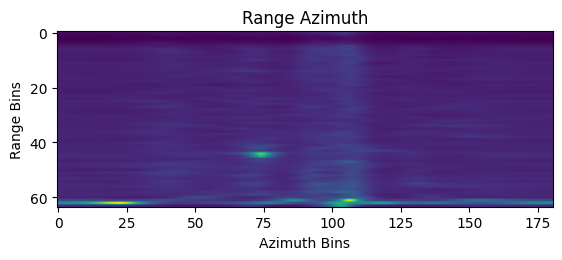

In [18]:
plt.imshow(np.abs(range_azimuth));
plt.xlabel("Azimuth Bins");
plt.ylabel("Range Bins");
plt.title("Range Azimuth");

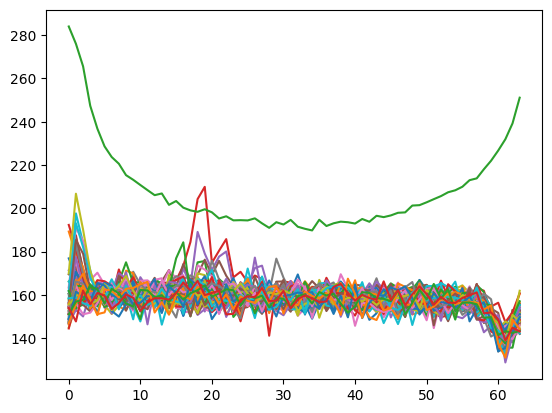

In [35]:
plt.plot(range_doppler.T);